In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Load the dataset from a CSV file
dataset = '/content/drive/MyDrive/new_dataset/soybean_small.csv'
column_names = [
    'date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist', 'area-damaged',
    'severity', 'seed-tmt', 'germination', 'plant-growth', 'leaves', 'leafspots-halo',
    'leafspots-marg', 'leafspot-size', 'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem',
    'lodging', 'stem-cankers', 'canker-lesion', 'fruiting-bodies', 'external-decay',
    'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods', 'fruit-spots', 'seed',
    'mold-growth', 'seed-discolor', 'seed-size', 'shriveling', 'roots', 'class'
]
dataset = pd.read_csv(dataset, header=None, names=column_names)
X = dataset[['seed', 'plant-stand', 'germination']]
y = dataset[['class']]


dataset.head()


,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36
1,4,0,2,1,1,1,0,1,0,2,...,0,0,4,0,0,0,0,0,0,D1
2,5,0,2,1,0,3,1,1,1,2,...,0,0,4,0,0,0,0,0,0,D1
3,3,0,2,1,0,2,0,2,1,1,...,0,0,4,0,0,0,0,0,0,D1
4,6,0,2,1,0,1,1,1,0,0,...,0,0,4,0,0,0,0,0,0,D1


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             48 non-null     object
 1   plant-stand      48 non-null     object
 2   precip           48 non-null     object
 3   temp             48 non-null     object
 4   hail             48 non-null     object
 5   crop-hist        48 non-null     object
 6   area-damaged     48 non-null     object
 7   severity         48 non-null     object
 8   seed-tmt         48 non-null     object
 9   germination      48 non-null     object
 10  plant-growth     48 non-null     object
 11  leaves           48 non-null     object
 12  leafspots-halo   48 non-null     object
 13  leafspots-marg   48 non-null     object
 14  leafspot-size    48 non-null     object
 15  leaf-shread      48 non-null     object
 16  leaf-malf        48 non-null     object
 17  leaf-mild        48 non-null     obje

In [ ]:
print(dataset.describe())

       date plant-stand precip temp hail crop-hist area-damaged severity  \
count    48          48     48   48   48        48           48       48   
unique    8           3      4    4    3         5            5        3   
top       0           1      2    1    0         3            1        1   
freq     10          25     33   24   32        15           29       28   

       seed-tmt germination  ... sclerotia fruit-pods fruit-spots seed  \
count        48          48  ...        48         48          48   48   
unique        3           4  ...         3          3           2    2   
top           0           2  ...         0          3           4    0   
freq         24          19  ...        37         27          47   47   

       mold-growth seed-discolor seed-size shriveling roots class  
count           48            48        48         48    48    48  
unique           2             2         2          2     3     5  
top              0             0         0  

In [ ]:
print(dataset.columns)

Index(['date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist',
       'area-damaged', 'severity', 'seed-tmt', 'germination', 'plant-growth',
       'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size',
       'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem', 'lodging',
       'stem-cankers', 'canker-lesion', 'fruiting-bodies', 'external-decay',
       'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods', 'fruit-spots',
       'seed', 'mold-growth', 'seed-discolor', 'seed-size', 'shriveling',
       'roots', 'class'],
      dtype='object')


In [ ]:
# Check for missing values and drop them
dataset.dropna(inplace=True)
# Look for missing values
dataset.isna().sum()

date               0
plant-stand        0
precip             0
temp               0
hail               0
crop-hist          0
area-damaged       0
severity           0
seed-tmt           0
germination        0
plant-growth       0
leaves             0
leafspots-halo     0
leafspots-marg     0
leafspot-size      0
leaf-shread        0
leaf-malf          0
leaf-mild          0
stem               0
lodging            0
stem-cankers       0
canker-lesion      0
fruiting-bodies    0
external-decay     0
mycelium           0
int-discolor       0
sclerotia          0
fruit-pods         0
fruit-spots        0
seed               0
mold-growth        0
seed-discolor      0
seed-size          0
shriveling         0
roots              0
class              0
dtype: int64

In [ ]:
#features and target
X = dataset[['seed', 'plant-stand', 'germination']]
y = dataset['class']

In [ ]:
# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X, drop_first=True)


In [ ]:
# Encode categorical variables using OneHotEncoder
X = dataset.drop(columns=['seed', 'plant-stand', 'germination'])
y = dataset['class']

In [ ]:
# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X)


In [ ]:
# Feature selection using Recursive Feature Elimination (RFE) with Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=4)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-small.data"
column_names = [
    "date", "plant-stand", "precip", "temp", "hail", "crop-hist", "area-damaged",
    "severity", "seed-tmt", "germination", "plant-growth", "leaves", "leafspots-halo",
    "leafspots-marg", "leafspot-size", "leaf-shread", "leaf-malf", "leaf-mild",
    "stem", "lodging", "stem-cankers", "canker-lesion", "fruiting-bodies", "external decay",
    "mycelium", "int-discolor", "sclerotia", "fruit-pods", "fruit spots", "seed",
    "mold-growth", "seed-discolor", "seed-size", "shriveling", "roots", "class"
]
df = pd.read_csv(url, names=column_names)

# Separate features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE) with Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=4)
rfe.fit(X_train_scaled, y_train)
selected_features = X.columns[rfe.support_]
print(f"Selected features: {selected_features}")

# Select only the selected features for train and test sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Standardize the selected features
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Now you can proceed with training your model or further analysis using the selected features.


Selected features: Index(['leaves', 'fruiting-bodies', 'sclerotia', 'roots'], dtype='object')


In [ ]:
# Define classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier()
}

In [ ]:
# Make predictions on the test data
y_pred = classifier.predict(X_test_selected_scaled)


In [ ]:
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)


In [ ]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'{name} - Accuracy: {accuracy:.4f}')


Bagging - Accuracy: 0.8667


In [ ]:
# Compute and print classification report
print(f'{name} - Classification Report:\n{classification_report(y_test, y_pred)}')


Bagging - Classification Report:
              precision    recall  f1-score   support

          D1       0.80      1.00      0.89         4
          D2       1.00      1.00      1.00         2
          D3       1.00      0.50      0.67         4
          D4       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.91      0.88      0.87        15
weighted avg       0.89      0.87      0.85        15



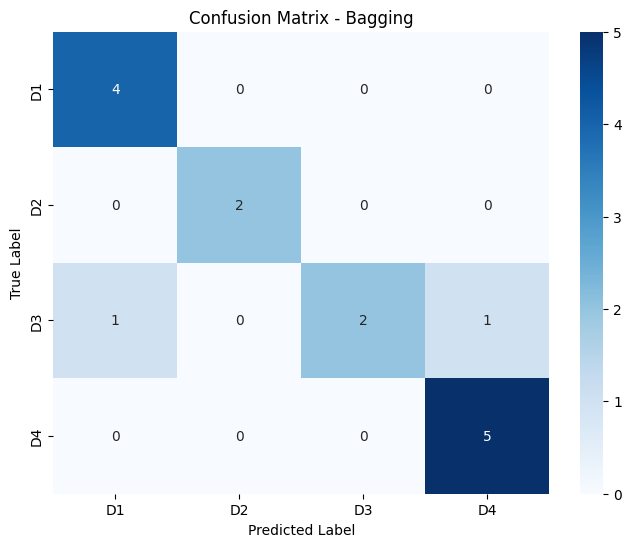

In [ ]:
# Plot heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {name}')
plt.show()



In [ ]:
# Train and evaluate each classifier
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train_selected_scaled, y_train)

    # Make predictions on the test data
    y_pred = classifier.predict(X_test_selected_scaled)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} - Accuracy: {accuracy:.4f}')


Decision Tree - Accuracy: 0.8667
K-Nearest Neighbors - Accuracy: 0.9333
Logistic Regression - Accuracy: 0.9333
AdaBoost - Accuracy: 0.9333
Bagging - Accuracy: 0.8667
